# Lab 2: Company Valuation

In [1]:
from numpy.random import choice
import matplotlib.pyplot as plt
import numpy.random

# 1. Net Present Value
<b>a)</b> We can store B, C, and the interest rate in tuples, and then store the tuples in an array where the time t is equal to the index of the array<br>
<br>
<b>b)</b> Function:

In [2]:
def npv( info_array ):
    """Takes an array of tuples with cash inflow, cash outflow, and interest rate 
       Returns the net present value"""
    
    npv = 0
    for t in range(0, len(info_array)):
        info = info_array[t] #tuple at time t
        netcf = info[0] - info[1]
        pvcf = float(netcf)/((1+info[2])**t)
        npv += pvcf
        
    return npv

print(npv([(2,1,.05), (1,0,.05), (5,7,.05)]))

0.1383219954648527


## 3. Probabilistic Net Present Value
<b>a)</b> The parameters of the random variable could be represented as a tuple containing 3 values. The first would be the amount of a success, the second would be the amount of a failure, and the third would be the probability of a success.<br>
<br>
<b>b)</b> Function to return expected net present value: 

In [3]:
def e_bernoulli( dist ):
    "returns expected value of distribution"
    expected = dist[0]*dist[2] + dist[1]*(1-dist[2])
    return expected

print(e_bernoulli((1,0,0.5)))

def e_npv( info_array, dist ):
    """Takes an array of tuples with cash inflow, cash outflow, and interest rate,
       and a tuple for the Bernoulli random variable
       Returns the net present value"""
    
    npv = 0
    for t in range(0, len(info_array)):
        info = info_array[t] #tuple at time t
        netcf = e_bernoulli( dist ) - info[1]
        pvcf = float(netcf)/((1+info[2])**t)
        npv += pvcf
        
    return npv

print(e_npv([(2,1,.05), (1,0,.05), (5,7,.05)], (5,2,0.5)))

0.5
2.6587301587301586


## 4. Probabilistic Net Present Value
<b>a)</b> Function to return net present value with Bernoulli random variable:

In [4]:
def bernoulli( dist ):
    "Takes a tuple with success, fail, and p, and returns a value"
    draw = choice([dist[0], dist[1]], 1, p=[dist[2], 1-dist[2]])
    return draw

print(bernoulli((1,0,0.5)))

def p_npv( info_array, dist ):
    """Takes an array of tuples with cash inflow, cash outflow, and interest rate,
       and a tuple for the Bernoulli random variable
       Returns the net present value"""
    
    npv = 0
    for t in range(0, len(info_array)):
        info = info_array[t] #tuple at time t
        netcf = bernoulli( dist ) - info[1]
        pvcf = float(netcf)/((1+info[2])**t)
        npv += pvcf
        
    return npv

print(p_npv([(2,1,.05), (1,0,.05), (5,7,.05)], (5,2,0.5)))

[0]
6.947845804988663


<b>b)</b> Record and store net present value k times:

In [5]:
values = []
k = 100
for x in range(0,k):
    values.append(p_npv([(2,1,.05), (1,0,.05), (5,3,.05), (1,0,.05)], (5,2,0.5)))

<b>c)</b> Histogram of the net present values

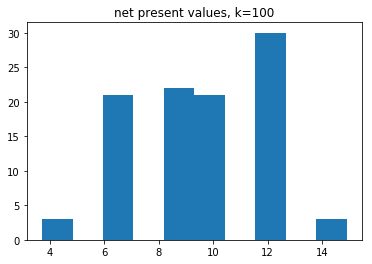

In [6]:
def plot_hist(values):
    plt.hist(values)
    title = 'net present values, k=' + str(k)
    plt.title(title)
    plt.show()
    
plot_hist(values)

<b>d)</b> If the interest rate were random, we could write a function to find the expected value of the interest rate. This can be done by simply multiplying the probability of getting a certain interest rate with that interest rate, and getting the sum. Afterwards, this value can be passed in separately into the net present value function above, similar to how the expected Bernoulli net present value was calculated.

In [7]:
import csv

with open('AAPL.csv', 'r') as f:
  reader = csv.reader(f)
  AAPL = list(reader)

print(AAPL)

[['Date', 'Dividends'], ['2017-05-11', '0.63'], ['2017-08-10', '0.63'], ['2017-11-10', '0.63'], ['2018-02-09', '0.63']]


In [8]:
AAPL_list = []

for i in range(0, 1000):
    AAPL_list.append((0.63, 0, .005))

print(npv(AAPL_list))

125.76607736981033


Assume market price is fair.

## Most Recent Dividend for Microsoft

In [37]:
MSFT_list = []

for i in range(0, 200):
    #MSFT_list.append((0.42, 0, .005))
    MSFT_list.append((0.42, 0, .005))
    
print(npv(MSFT_list))

53.286137968992094


## Normal Distribution for Microsoft Dividends

In [10]:
with open('MSFT.csv', 'r') as f:
  reader = csv.reader(f)
  MSFT = list(reader)

print(MSFT)

[['Date', 'Dividends'], ['5/14/2013', '0.23'], ['8/13/2013', '0.23'], ['11/19/2013', '0.28'], ['2/18/2014', '0.28'], ['5/13/2014', '0.28'], ['8/19/2014', '0.28'], ['11/18/2014', '0.31'], ['2/17/2015', '0.31'], ['5/19/2015', '0.31'], ['8/18/2015', '0.31'], ['11/17/2015', '0.36'], ['2/16/2016', '0.36'], ['5/17/2016', '0.36'], ['8/16/2016', '0.36'], ['11/15/2016', '0.39'], ['2/14/2017', '0.39'], ['5/16/2017', '0.39'], ['8/15/2017', '0.39'], ['11/15/2017', '0.42'], ['2/14/2018', '0.42']]


In [11]:
MSFT_dividends = []

for i in range(1, len(MSFT)):
    MSFT_dividends.append(float(MSFT[i][1]))
    
print(MSFT_dividends)

[0.23, 0.23, 0.28, 0.28, 0.28, 0.28, 0.31, 0.31, 0.31, 0.31, 0.36, 0.36, 0.36, 0.36, 0.39, 0.39, 0.39, 0.39, 0.42, 0.42]


In [12]:
import statistics

MSFT_mean = statistics.mean(MSFT_dividends)
MSFT_sd = statistics.pstdev(MSFT_dividends)

print(MSFT_mean)
print(MSFT_sd)

0.333
0.057280013966478735


In [13]:
def normal( mean, sd ):
    "Takes mean, sd, and returns a value"
    draw = s = numpy.random.normal(mean, sd, 1)
    return draw

print(normal(MSFT_mean, MSFT_sd))

[ 0.2980449]


In [36]:
MSFT_list = []

for i in range(0, 200):
    MSFT_list.append((normal(MSFT_mean, MSFT_sd), 0, .005))

print(npv(MSFT_list))

41.96088040331965


## Growth Rate Valuation

In [35]:
MSFT_list = []
g = .0097

for i in range(0, 200):
    MSFT_list.append((0.42+(i*.0097), 0, .005))

print(npv(MSFT_list))

155.6085553968206
